<a href="https://colab.research.google.com/github/mocccca/cmor438/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Perceptron**

definition:

A perceptron is the simplest form of a neural network, essentially a single neuron model. It takes multiple inputs, applies weights to them, sums the weighted inputs, and then applies an activation function to produce a single binary output. Think of it as a decision-maker that classifies data into one of two categories.

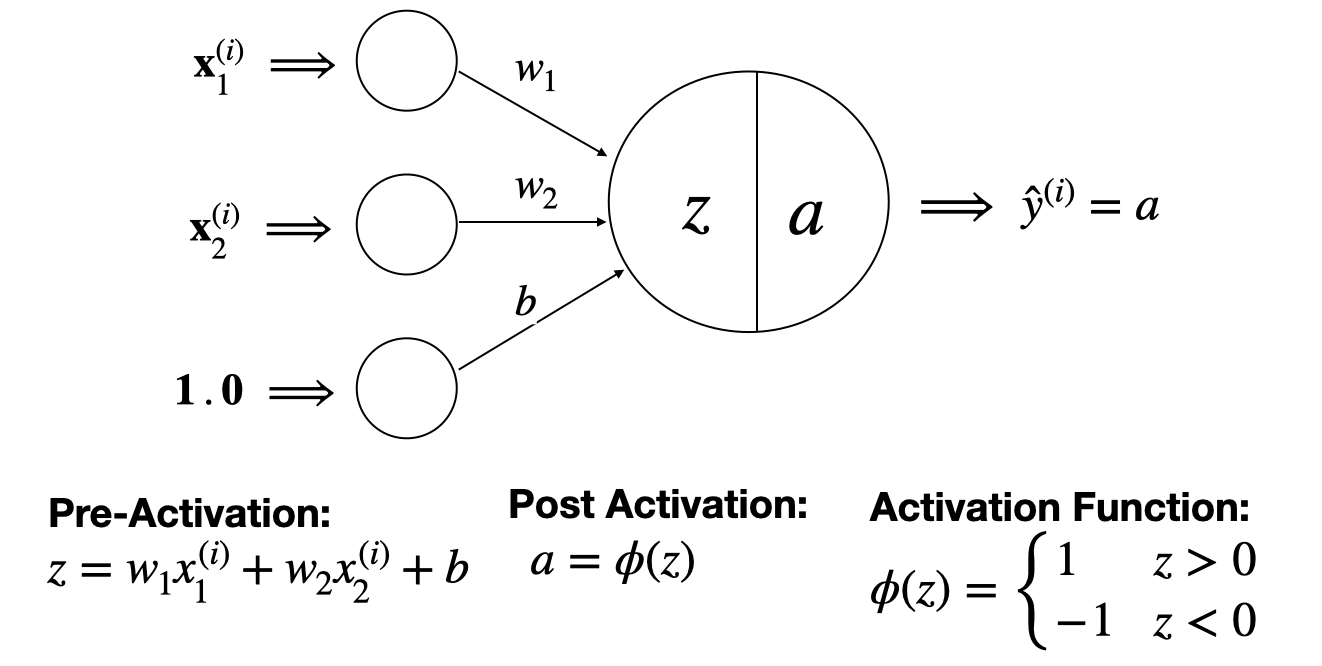

In [2]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from typing import List, Tuple, Optional
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set_theme()

In [3]:
class Perceptron:
    """
    A reusable Perceptron implementation for binary classification.

    Attributes:
        weights (np.ndarray): The weight vector of the perceptron
        bias (float): The bias term
        loss_history (List[float]): Records loss at each training iteration
    """

    def __init__(self, random_seed: Optional[int] = None):
        """
        Initialize the perceptron with random weights and bias.

        Args:
            random_seed: Optional seed for reproducibility
        """
        if random_seed is not None:
            np.random.seed(random_seed)
        self.weights = None
        self.bias = None
        self.loss_history = []

    def initialize_parameters(self, n_features: int):
        """Initialize weights and bias with random values."""
        self.weights = np.random.randn(n_features)
        self.bias = np.random.randn()

    @staticmethod
    def preactivation(x: np.ndarray, w: np.ndarray, b: float) -> float:
        """Calculate the preactivation (w·x + b)."""
        return np.dot(x, w) + b

    @staticmethod
    def sign_activation(z: float) -> int:
        """Sign activation function."""
        return 1 if z >= 0 else -1

    def predict(self, x: np.ndarray) -> int:
        """Predict class label for a single sample."""
        z = self.preactivation(x, self.weights, self.bias)
        return self.sign_activation(z)

    @staticmethod
    def loss(y_true: int, y_pred: int) -> float:
        """Calculate loss for a single prediction."""
        return (1/4) * (y_pred - y_true) ** 2

    def total_loss(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate total loss across all samples."""
        return sum(self.loss(y_i, self.predict(x_i)) for x_i, y_i in zip(X, y))

    def update(self, x: np.ndarray, y_true: int):
        """Update weights and bias based on a single sample."""
        y_pred = self.predict(x)
        if y_true != y_pred:
            self.weights += y_true * x
            self.bias += y_true

    def fit(self, X: np.ndarray, y: np.ndarray,
            max_iter: int = 5000,
            verbose: bool = False,
            print_interval: int = 100) -> None:
        """
        Train the perceptron on the given data.

        Args:
            X: Feature matrix (n_samples, n_features)
            y: Target labels (n_samples,)
            max_iter: Maximum training iterations
            verbose: Whether to print progress
            print_interval: How often to print progress if verbose=True
        """
        n_samples, n_features = X.shape
        self.initialize_parameters(n_features)

        for i in range(max_iter):
            current_loss = self.total_loss(X, y)
            self.loss_history.append(current_loss)

            if verbose and i % print_interval == 0:
                print(f"Iteration {i}: Loss = {current_loss:.4f}")

            # Update weights for each sample
            for x_i, y_i in zip(X, y):
                self.update(x_i, y_i)

    def plot_loss_history(self) -> None:
        """Plot the training loss over iterations."""
        plt.figure(figsize=(8, 4))
        plt.plot(range(len(self.loss_history)), self.loss_history)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Training Loss Over Time')
        plt.grid(True)
        plt.show()

    def plot_decision_boundary(self, X: np.ndarray, y: np.ndarray,
                             feature_names: Tuple[str, str]) -> None:
        """
        Plot the decision boundary along with the data points.

        Args:
            X: Feature matrix (n_samples, 2)
            y: Target labels (n_samples,)
            feature_names: Tuple of (x_axis_name, y_axis_name)
        """
        if X.shape[1] != 2:
            raise ValueError("Decision boundary plotting only works for 2D data")

        plt.figure(figsize=(8, 6))

        # Plot data points
        plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', label='Class 1')
        plt.scatter(X[y == -1, 0], X[y == -1, 1], color='magenta', label='Class -1')

        # Calculate decision boundary
        x_min, x_max = X[:, 0].min(), X[:, 0].max()
        x_vals = np.linspace(x_min, x_max, 100)
        y_vals = (-self.weights[0] * x_vals - self.bias) / self.weights[1]

        plt.plot(x_vals, y_vals, 'b-', label='Decision Boundary')
        plt.xlabel(feature_names[0])
        plt.ylabel(feature_names[1])
        plt.title('Perceptron Decision Boundary')
        plt.legend()
        plt.grid(True)
        plt.show()

    def evaluate(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate accuracy on the given data."""
        predictions = np.array([self.predict(x_i) for x_i in X])
        return (predictions == y).mean()

    def plot_confusion_matrix(y_true, y_pred, classes=None, title='Perceptron Confusion Matrix'):
        """
        Plots a styled confusion matrix with annotations.

        Args:
            y_true: True labels (1 or -1)
            y_pred: Predicted labels (1 or -1)
            classes: Optional class names
            title: Plot title
        """
        # Convert -1/1 to 0/1 if needed for sklearn
        y_true = np.where(y_true == -1, 0, y_true)
        y_pred = np.where(y_pred == -1, 0, y_pred)

        cm = confusion_matrix(y_true, y_pred)

        if classes is None:
            classes = ['Class -1', 'Class 1']

        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=classes, yticklabels=classes)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(title)
        plt.show()

        # Print metrics
        tn, fp, fn, tp = cm.ravel()
        print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn):.1%}")
        print(f"Precision (Class 1): {tp / (tp + fp):.1%}")
        print(f"Recall (Class 1): {tp / (tp + fn):.1%}")
        print(f"Specificity (Class -1): {tn / (tn + fp):.1%}")

In [5]:
# Import dataset
url = "https://raw.githubusercontent.com/mocccca/cmor438/main/Leisure_Intereset_Dataset.csv"
li = pd.read_csv(url)


# Select only 'cabin_teaching_education', 'cabin_construction_woodwork', and 'gender' variables
filtered_li = li[['cabin_teaching_education', 'cabin_construction_woodwork', 'gender']]


# Remove all rows where gender == '3', as people identified as non-binary filled out 3, but the output for perceptron is binary
filtered_li = filtered_li[filtered_li['gender'] != 3].copy()


# Now map the gender to 1 and -1
filtered_li['gender'] = filtered_li['gender'].map({1: 1, 2: -1})
filtered_li

,cabin_teaching_education,cabin_construction_woodwork,gender
0,13,7,1
1,8,16,1
2,10,15,1
3,14,16,-1
4,11,12,-1
...,...,...,...
116,13,12,-1
117,11,17,1
118,17,17,-1
119,14,6,-1


In [6]:
# 2. Convert to numpy arrays
X = filtered_li[['cabin_teaching_education','cabin_construction_woodwork']].to_numpy()
y = filtered_li['gender'].to_numpy()

In [7]:
# 3. Initialize and train the perceptron
perceptron = Perceptron(random_seed=42)
perceptron.fit(X, y, max_iter=5000, verbose=True, print_interval=500)

Iteration 0: Loss = 77.0000
Iteration 500: Loss = 76.0000
Iteration 1000: Loss = 76.0000
Iteration 1500: Loss = 76.0000
Iteration 2000: Loss = 76.0000
Iteration 2500: Loss = 76.0000
Iteration 3000: Loss = 76.0000
Iteration 3500: Loss = 76.0000
Iteration 4000: Loss = 76.0000
Iteration 4500: Loss = 76.0000


Training accuracy: 34.48%


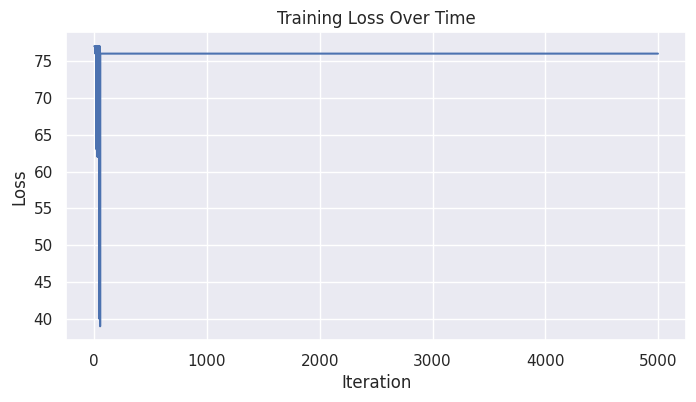

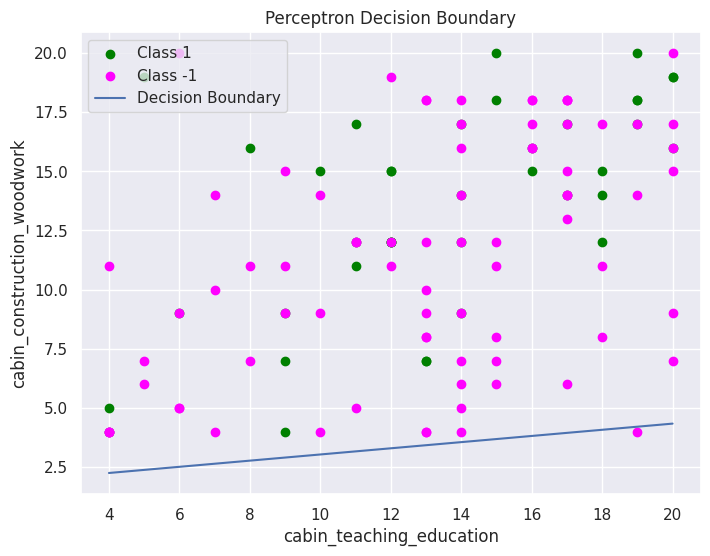

In [8]:
# 4. Evaluate and visualize
print(f"Training accuracy: {perceptron.evaluate(X, y):.2%}")
perceptron.plot_loss_history()
perceptron.plot_decision_boundary(X, y, feature_names=('cabin_teaching_education', 'cabin_construction_woodwork'))

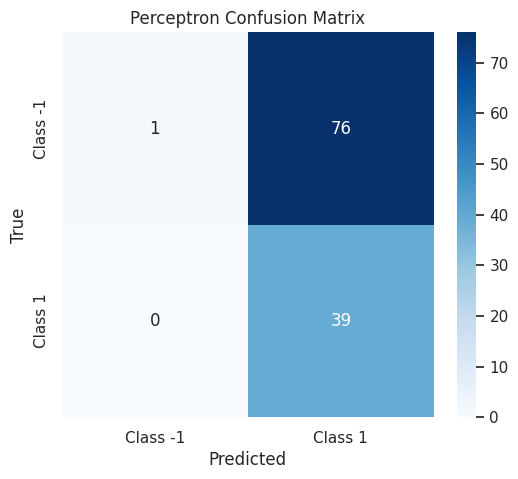

Accuracy: 34.5%
Precision (Class 1): 33.9%
Recall (Class 1): 100.0%
Specificity (Class -1): 1.3%


In [9]:
# 5. performance metrics
y_pred = np.array([perceptron.predict(x_i) for x_i in X])
Perceptron.plot_confusion_matrix(y, y_pred)


the above seem not to be working, let's try another variable

In [10]:
# Select only the relevant columns
filtered_li1 = li[['time_wif_composite', 'strain_wif_composite', 'behavior_wif_composite']].copy()

# Map behavior_wif_composite to 1 and -1 based on the range
filtered_li1['behavior_wif_composite'] = filtered_li1['behavior_wif_composite'].apply(
    lambda x: 1 if 3 <= x <= 9 else (-1 if 10 <= x <= 15 else None)
)
filtered_li1

,time_wif_composite,strain_wif_composite,behavior_wif_composite
0,12,8,1
1,11,13,-1
2,6,6,1
3,15,15,-1
4,9,10,1
...,...,...,...
116,11,7,-1
117,7,5,1
118,12,8,1
119,10,6,-1


In [11]:
# 2. Convert to numpy arrays
X = filtered_li1[['time_wif_composite','strain_wif_composite']].to_numpy()
y = filtered_li1['behavior_wif_composite'].to_numpy()

In [12]:
# 3. Initialize and train the perceptron
perceptron = Perceptron(random_seed=42)
perceptron.fit(X, y, max_iter=5000, verbose=True, print_interval=500)

Iteration 0: Loss = 37.0000
Iteration 500: Loss = 38.0000
Iteration 1000: Loss = 38.0000
Iteration 1500: Loss = 38.0000
Iteration 2000: Loss = 38.0000
Iteration 2500: Loss = 38.0000
Iteration 3000: Loss = 38.0000
Iteration 3500: Loss = 38.0000
Iteration 4000: Loss = 38.0000
Iteration 4500: Loss = 38.0000


Training accuracy: 68.60%


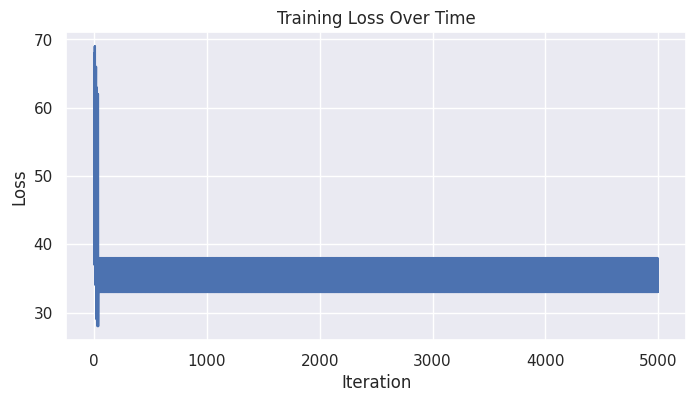

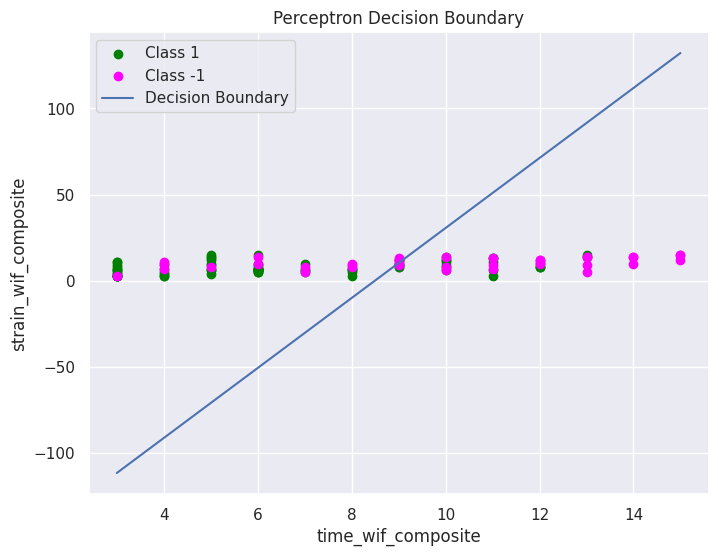

In [13]:
# 4. Evaluate and visualize
print(f"Training accuracy: {perceptron.evaluate(X, y):.2%}")
perceptron.plot_loss_history()
perceptron.plot_decision_boundary(X, y, feature_names=('time_wif_composite', 'strain_wif_composite'))

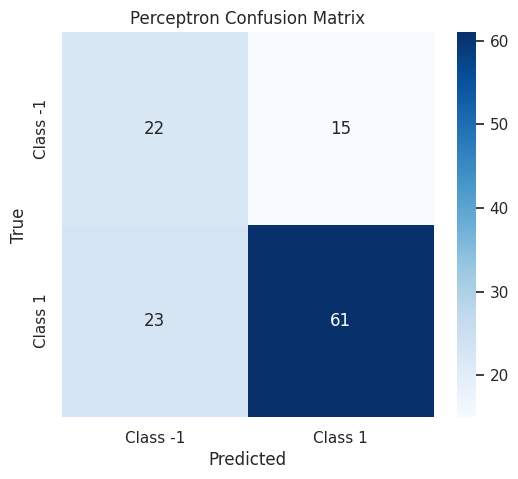

Accuracy: 68.6%
Precision (Class 1): 80.3%
Recall (Class 1): 72.6%
Specificity (Class -1): 59.5%


In [14]:
#5 performance metrics
y_pred = np.array([perceptron.predict(x_i) for x_i in X])
Perceptron.plot_confusion_matrix(y, y_pred)